In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Ignore deprecated warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [13]:
# Read the train and test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [27]:
# Train dataset
train.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [26]:
# Test dataset
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [15]:
print('Train shape',train.shape)
print('Test shape',test.shape)

Train shape (2000, 21)
Test shape (1000, 21)


In [15]:
print('Train data types')
print(train.dtypes)
print('\nTest data types')
print(test.dtypes)

Train data types
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc               float64
four_g           float64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h             float64
sc_w             float64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

Test data types
id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
ta

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [5]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [87]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [92]:
train[train.isnull().any(axis=1)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
157,1224,0,0.5,0,NaN,NaN,NaN,NaN,NaN,NaN,...,747.0,826.0,506.0,10.0,0.0,11,1,1,1,0
158,1356,0,2.8,0,NaN,NaN,NaN,NaN,NaN,NaN,...,1612.0,1983.0,3702.0,17.0,0.0,19,0,0,0,3
217,1336,0,0.9,0,5.0,1.0,17.0,NaN,194.0,5.0,...,55.0,583.0,1869.0,13.0,1.0,16,1,1,1,1
261,728,0,2.7,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,1.0,12,1,1,1,1
276,1662,0,0.5,0,NaN,NaN,NaN,0.8,126.0,4.0,...,32.0,1509.0,3760.0,9.0,5.0,13,1,1,1,3
292,1995,1,1.9,0,6.0,0.0,9.0,0.8,139.0,6.0,...,NaN,1963.0,1203.0,14.0,12.0,18,1,1,1,2
293,1517,0,0.5,0,6.0,1.0,48.0,0.6,143.0,5.0,...,NaN,1489.0,2822.0,15.0,5.0,11,1,1,1,3
341,811,1,2.4,1,5.0,1.0,2.0,0.3,106.0,6.0,...,NaN,NaN,NaN,NaN,NaN,2,1,0,1,1
371,1011,0,1.1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,481.0,749.0,2261.0,7.0,6.0,16,1,1,1,1


Since the null values are small portion of the data I will drop these values.

In [142]:
train.dropna(inplace=True)

In [143]:
train[train.isnull().any(axis=1)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [144]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [95]:
train.duplicated().sum()

0

In [96]:
test.duplicated().sum()

0

In [34]:
test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [74]:
comparison_df = pd.DataFrame(columns=["Column", "Train_dType", "Test_dType", 'train_value', 'test_value'])


for column_name, train_data_type in train.dtypes.items():
   
    if column_name in test.columns:
        
        test_data_type = test.dtypes[column_name]
       
        comparison_df = comparison_df.append({
            "Column": column_name,
            "Train_dType": train_data_type,
            "Test_dType": test_data_type,
            "train_value": train[column_name][0],
            "test_value": test[column_name][0]
        }, ignore_index=True)


print(comparison_df)

           Column Train_dType Test_dType train_value test_value
0   battery_power       int64      int64         842       1043
1            blue       int64      int64           0          1
2     clock_speed     float64    float64         2.2        1.8
3        dual_sim       int64      int64           0          1
4              fc     float64      int64         1.0         14
5          four_g     float64      int64         0.0          0
6      int_memory     float64      int64         7.0          5
7           m_dep     float64    float64         0.6        0.1
8       mobile_wt     float64      int64       188.0        193
9         n_cores     float64      int64         2.0          3
10             pc     float64      int64         2.0         16
11      px_height     float64      int64        20.0        226
12       px_width     float64      int64       756.0       1412
13            ram     float64      int64      2549.0       3476
14           sc_h     float64      int64

In [106]:
train['battery_power'].describe()

count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

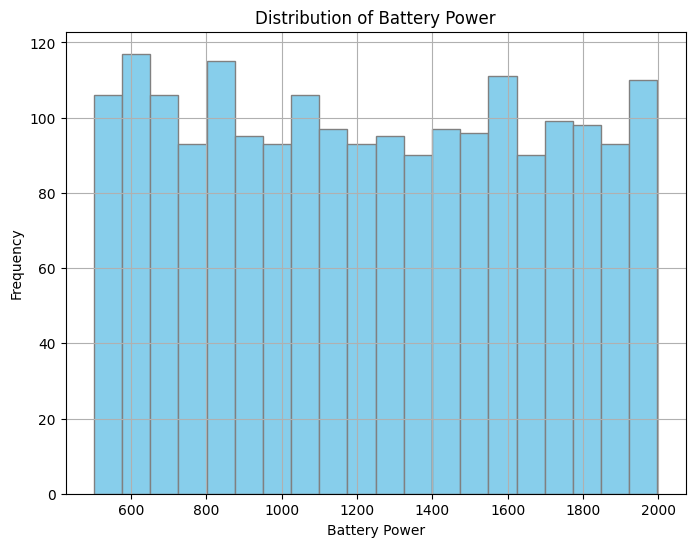

In [121]:
# Plot histogram of battery_power values
plt.figure(figsize=(8, 6))
plt.hist(train['battery_power'], bins=20, color='skyblue', edgecolor='gray')
plt.title('Distribution of Battery Power')
plt.xlabel('Battery Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [145]:
train['blue'].value_counts()

0    1003
1     988
Name: blue, dtype: int64

In [146]:
train['clock_speed'].value_counts()

0.5    410
2.8     84
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     64
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.8     58
0.9     57
2.4     57
1.2     56
2.6     55
2.7     54
1.1     50
3.0     28
Name: clock_speed, dtype: int64

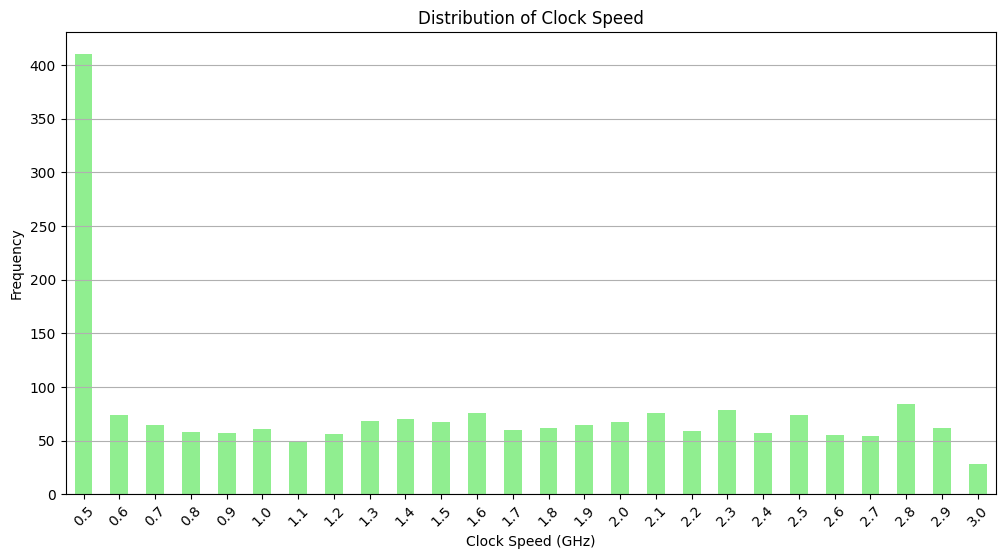

In [147]:
# Plot bar plot of clock_speed values
plt.figure(figsize=(12, 6))
train['clock_speed'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Clock Speed')
plt.xlabel('Clock Speed (GHz)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [148]:
train['clock_speed'].describe()

count    1991.000000
mean        1.522451
std         0.815499
min         0.500000
25%         0.700000
50%         1.500000
75%         2.200000
max         3.000000
Name: clock_speed, dtype: float64

In [149]:
train['dual_sim'].value_counts()

1    1017
0     974
Name: dual_sim, dtype: int64

In [151]:
train['fc'].value_counts()

0.0     471
1.0     245
2.0     189
3.0     170
5.0     137
4.0     132
6.0     110
7.0     100
9.0      78
8.0      77
10.0     62
11.0     51
12.0     45
13.0     40
16.0     23
15.0     23
14.0     20
18.0     11
17.0      6
19.0      1
Name: fc, dtype: int64

In [152]:
train.fc.describe()

count    1991.000000
mean        4.307885
std         4.339735
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        19.000000
Name: fc, dtype: float64

In [153]:
train['fc'] = train['fc'].astype('int64')

In [156]:
train['four_g'].value_counts()

1.0    1037
0.0     954
Name: four_g, dtype: int64

In [157]:
train['four_g'] = train['four_g'].astype('int64')

In [158]:
train['four_g'].value_counts()

1    1037
0     954
Name: four_g, dtype: int64

In [166]:
train['int_memory'].value_counts()

27.0    47
16.0    45
14.0    45
57.0    42
2.0     41
        ..
29.0    23
38.0    23
62.0    21
4.0     20
59.0    18
Name: int_memory, Length: 63, dtype: int64

In [167]:
train['int_memory'] = train['int_memory'].astype('int64')

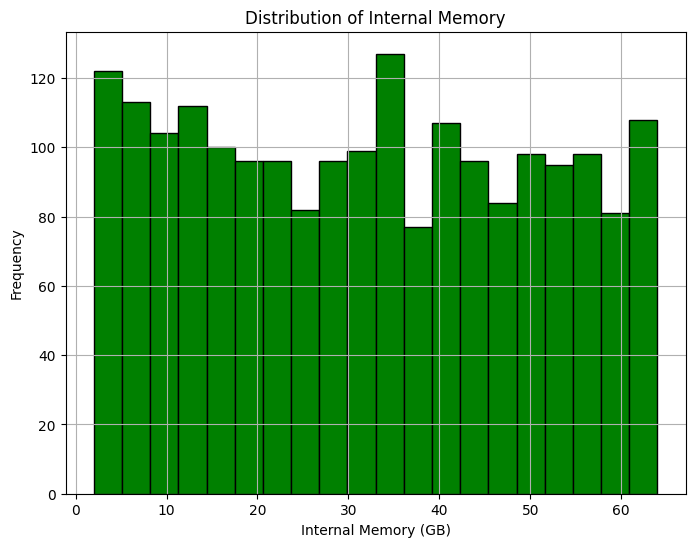

In [168]:
# Plot histogram of int_memory values
plt.figure(figsize=(8, 6))
plt.hist(train['int_memory'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Internal Memory')
plt.xlabel('Internal Memory (GB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [169]:
train['m_dep'].value_counts()

0.1    320
0.2    210
0.8    206
0.5    204
0.7    200
0.3    198
0.9    195
0.6    185
0.4    167
1.0    106
Name: m_dep, dtype: int64

In [170]:
train['m_dep'].describe()

count    1991.000000
mean        0.502009
std         0.288622
min         0.100000
25%         0.200000
50%         0.500000
75%         0.800000
max         1.000000
Name: m_dep, dtype: float64

In [171]:
train['mobile_wt'].value_counts()

182.0    28
101.0    27
185.0    27
199.0    26
146.0    26
         ..
116.0    10
140.0     9
120.0     9
149.0     9
96.0      9
Name: mobile_wt, Length: 121, dtype: int64

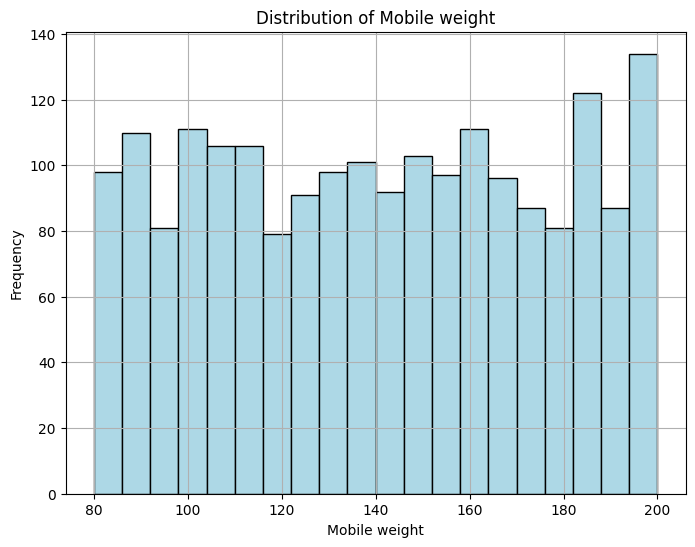

In [176]:
# Plot histogram of int_memory values
plt.figure(figsize=(8, 6))
plt.hist(train['mobile_wt'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Mobile weight')
plt.xlabel('Mobile weight')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [177]:
train['mobile_wt'] = train['mobile_wt'].astype('int64')

In [178]:
train['n_cores'].value_counts()

4.0    272
7.0    258
8.0    256
2.0    247
3.0    246
5.0    244
1.0    242
6.0    226
Name: n_cores, dtype: int64

In [179]:
train['n_cores'] = train['n_cores'].astype('int64')

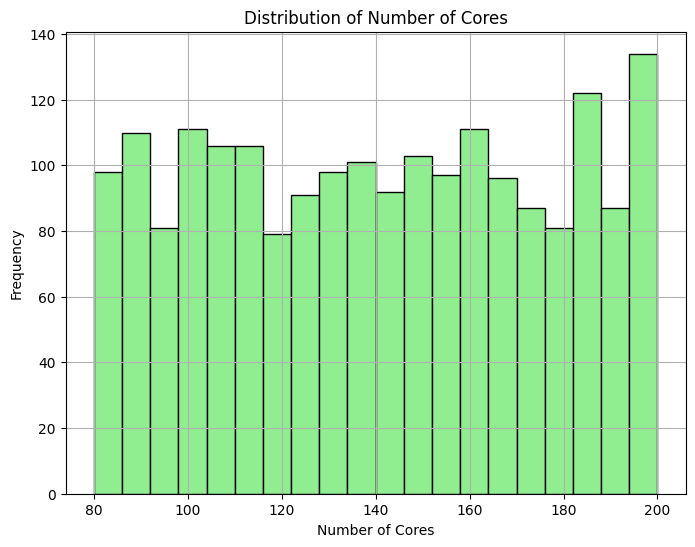

In [181]:
# Plot histogram of int_memory values
plt.figure(figsize=(8, 6))
plt.hist(train['mobile_wt'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Number of Cores')
plt.xlabel('Number of Cores')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [183]:
train['pc'].value_counts()

10.0    122
7.0     119
9.0     111
20.0    110
1.0     103
14.0    103
0.0     100
2.0      99
17.0     99
6.0      95
4.0      95
3.0      93
15.0     92
12.0     90
8.0      89
16.0     88
13.0     83
19.0     83
18.0     79
11.0     79
5.0      59
Name: pc, dtype: int64

In [184]:
train['pc'] = train['pc'].astype('int64')

In [187]:
train['ram'].value_counts()

1229.0    4
1464.0    4
2610.0    4
2227.0    4
3142.0    4
         ..
740.0     1
3226.0    1
411.0     1
2297.0    1
3919.0    1
Name: ram, Length: 1556, dtype: int64

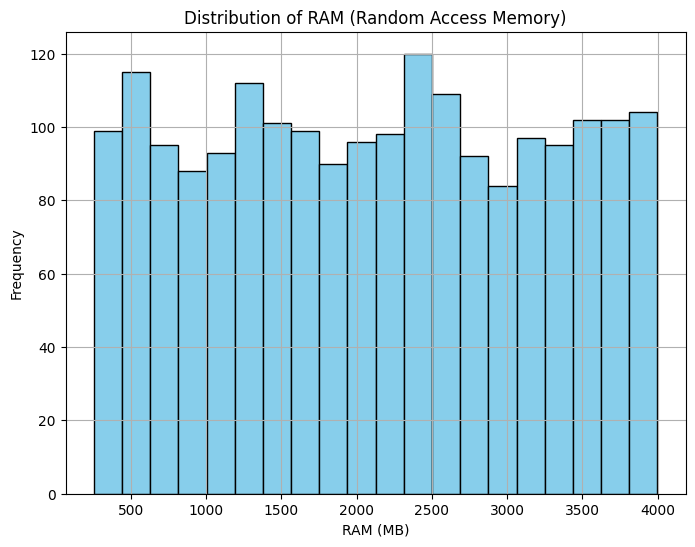

In [188]:
# Plot histogram of ram values
plt.figure(figsize=(8, 6))
plt.hist(train['ram'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of RAM (Random Access Memory)')
plt.xlabel('RAM (MB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [189]:
train['talk_time'].value_counts()

7     124
4     123
15    115
16    114
19    112
6     111
10    105
8     104
20    102
11    101
14    101
9     100
13     99
18     99
2      98
17     98
12     98
3      94
5      93
Name: talk_time, dtype: int64

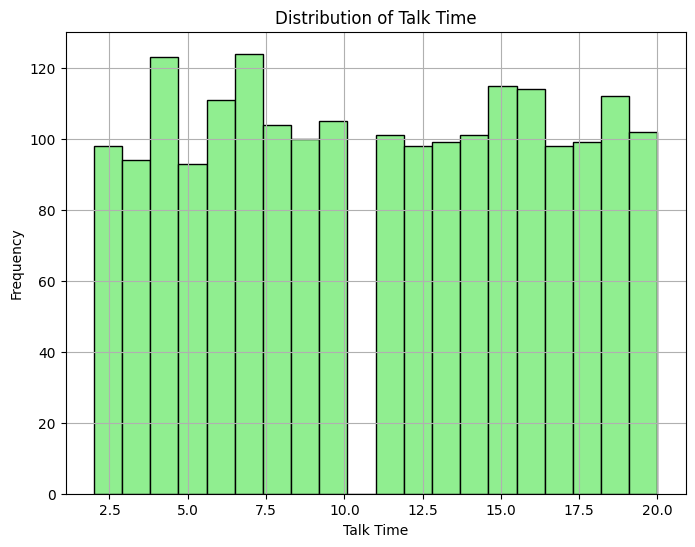

In [190]:
# Plot histogram of talk_time values
plt.figure(figsize=(8, 6))
plt.hist(train['talk_time'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Talk Time')
plt.xlabel('Talk Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [191]:
train['three_g'].value_counts()

1    1515
0     476
Name: three_g, dtype: int64

In [192]:
correlation = train[['three_g', 'four_g']].corr()

print(correlation)

          three_g    four_g
three_g  1.000000  0.584403
four_g   0.584403  1.000000


In [193]:
train['touch_screen'].value_counts()

1    999
0    992
Name: touch_screen, dtype: int64

In [194]:
train['wifi'].value_counts()

1    1006
0     985
Name: wifi, dtype: int64

In [195]:
# to avoid division by zero
train[train['sc_w'] == 0.0] = 1
# Create Total Pixel Resolution feature
train['total_pixel_resolution'] = train['px_height'] * train['px_width']

# Create Screen Aspect Ratio feature
train['screen_aspect_ratio'] = train['sc_h'] / train['sc_w']

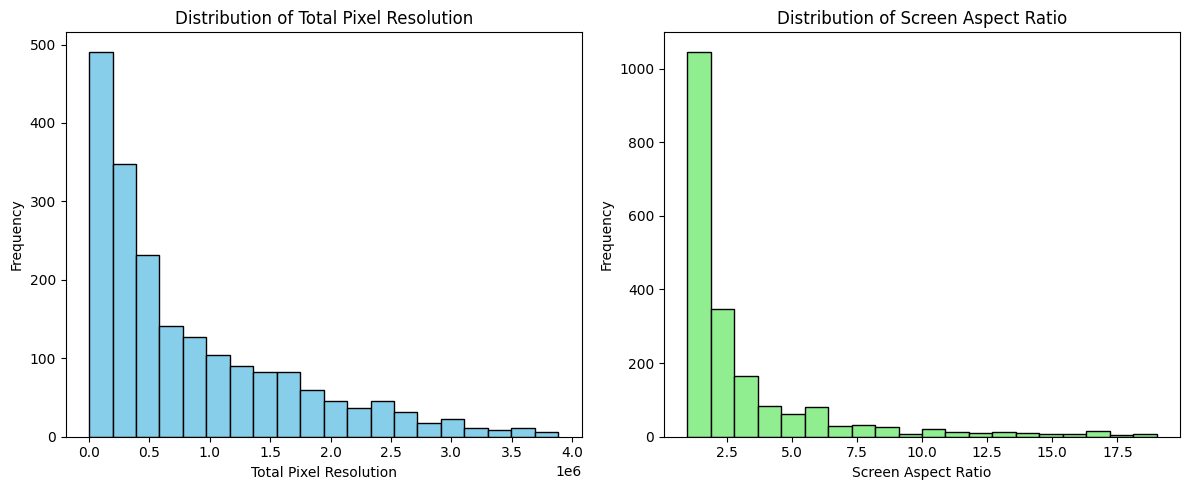

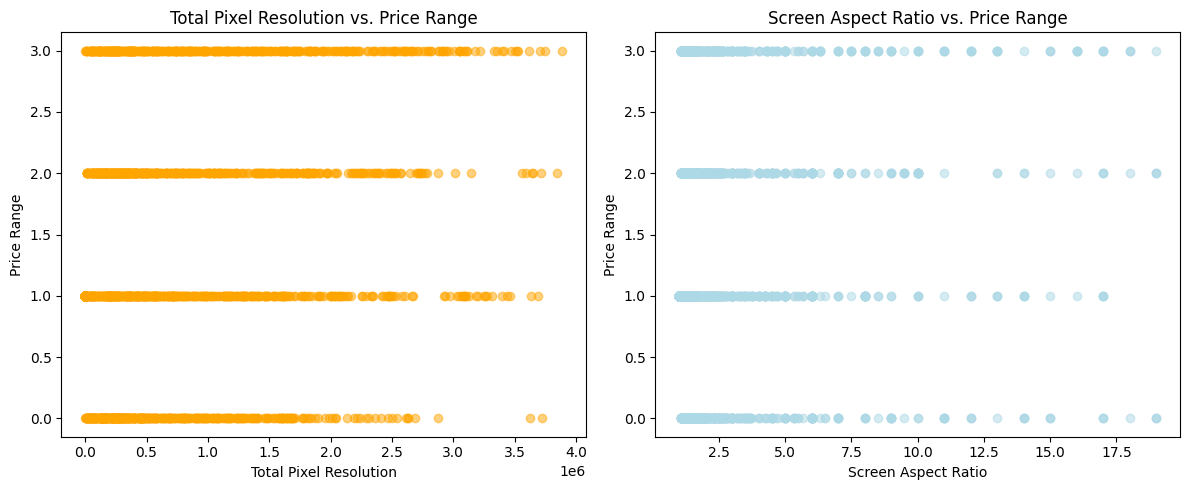

In [220]:
# Visualize distribution of interaction features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(train['total_pixel_resolution'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Pixel Resolution')
plt.xlabel('Total Pixel Resolution')
plt.ylabel('Frequency')


# Plot histogram of screen_aspect_ratio values
plt.subplot(1, 2, 2)
plt.hist(train['screen_aspect_ratio'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Screen Aspect Ratio')
plt.xlabel('Screen Aspect Ratio')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Explore relationship with target variable (price_range)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(train['total_pixel_resolution'], train['price_range'], color='orange', alpha=0.5)
plt.title('Total Pixel Resolution vs. Price Range')
plt.xlabel('Total Pixel Resolution')
plt.ylabel('Price Range')

plt.subplot(1, 2, 2)
plt.scatter(train['screen_aspect_ratio'], train['price_range'], color='lightblue', alpha=0.5)
plt.title('Screen Aspect Ratio vs. Price Range')
plt.xlabel('Screen Aspect Ratio')
plt.ylabel('Price Range')

plt.tight_layout()
plt.show()

A left-skewed distribution of total pixel resolution suggests that many devices in the dataset have lower pixel resolutions, while fewer devices have higher pixel resolutions.
This could be expected, as lower-end or budget-friendly devices may have lower pixel resolutions, while higher-end or premium devices may have higher pixel resolutions.

In [221]:
# Create Total Camera Megapixels feature
train['total_camera_megapixels'] = train['fc'] + train['pc']

# Create Camera Resolution Ratio feature
train['camera_resolution_ratio'] = train['fc'] / (train['pc'] + 1)  # Adding 1 to avoid division by zero


In [222]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Features and target variable
X = train.drop('price_range', axis=1)  # Features excluding the target variable
y = train['price_range']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train RandomForestClassifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [225]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,total_pixel_resolution,screen_aspect_ratio,total_camera_megapixels,camera_resolution_ratio
818,1320,0,0.5,1,7,0,48,0.2,168,5,...,8.0,5.0,9,0,0,1,163049.0,1.600000,23,0.411765
1467,1,1,1.0,1,1,1,1,1.0,1,1,...,1.0,1.0,1,1,1,1,1.0,1.000000,2,0.500000
1920,1,1,1.0,1,1,1,1,1.0,1,1,...,1.0,1.0,1,1,1,1,1.0,1.000000,2,0.500000
1959,1884,0,1.0,1,3,0,24,0.5,149,6,...,15.0,8.0,9,1,1,1,1377072.0,1.875000,7,0.600000
1099,1697,0,0.5,0,0,1,60,0.1,90,4,...,15.0,1.0,11,1,1,0,92048.0,15.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,831,0,2.4,0,10,0,55,0.5,86,6,...,12.0,11.0,3,1,1,0,213108.0,1.090909,22,0.769231
1303,888,0,2.6,1,2,1,33,0.4,198,2,...,12.0,1.0,20,1,0,0,550341.0,12.000000,19,0.111111
869,1236,1,2.8,0,6,1,32,0.3,143,4,...,16.0,12.0,14,1,1,1,690276.0,1.333333,24,0.315789
1468,1425,1,0.6,0,0,1,33,0.5,89,3,...,10.0,3.0,9,1,0,1,652608.0,3.333333,2,0.000000


In [224]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,total_pixel_resolution,screen_aspect_ratio,total_camera_megapixels,camera_resolution_ratio
896,1742,1,1.6,0,3,0,49,0.8,100,1,...,5.0,4.0,6,1,0,1,1665846.0,1.250000,12,0.300000
1679,1470,1,1.7,1,6,0,45,0.1,121,1,...,10.0,1.0,14,1,0,1,846930.0,10.000000,15,0.600000
423,1681,1,2.5,0,2,0,11,0.4,158,2,...,12.0,6.0,16,0,1,1,234975.0,2.000000,15,0.142857
1089,605,0,1.5,0,9,1,18,0.9,162,2,...,15.0,9.0,8,1,0,0,215824.0,1.666667,23,0.600000
1111,1735,1,1.9,1,0,1,59,0.7,148,6,...,6.0,1.0,9,1,1,0,115902.0,6.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,816,1,0.5,0,4,0,14,0.9,198,3,...,17.0,10.0,15,1,0,0,83142.0,1.700000,17,0.285714
265,1992,1,1.6,0,5,1,57,1.0,100,2,...,9.0,3.0,4,1,1,1,2476992.0,3.000000,20,0.312500
1412,951,0,0.5,0,6,1,15,0.6,81,2,...,16.0,11.0,16,1,1,0,798490.0,1.454545,23,0.333333
1552,1562,1,0.7,0,0,0,55,0.1,140,8,...,15.0,3.0,3,0,0,0,1832832.0,5.000000,1,0.000000


In [223]:
# Predict on test set
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.8972431077694235

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        97
           1       0.85      0.89      0.87       115
           2       0.91      0.80      0.85        98
           3       0.92      0.97      0.95        89

    accuracy                           0.90       399
   macro avg       0.90      0.90      0.90       399
weighted avg       0.90      0.90      0.90       399



In [31]:
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [1]:
!pip install mysql-connector-python 

Defaulting to user installation because normal site-packages is not writeable
  Using cached mysql_connector_python-8.4.0-cp39-cp39-macosx_13_0_arm64.whl.metadata (1.9 kB)
Using cached mysql_connector_python-8.4.0-cp39-cp39-macosx_13_0_arm64.whl (13.5 MB)


In [1]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

# MySQL database connection parameters
DB_USER = 'root'
DB_PASSWORD = 'password'
DB_HOST = '127.0.0.1'
DB_NAME = 'Maidscc'

# Test dataframe
test_data = pd.read_csv('test.csv')  
# Define the connection variable outside the try block
connection = None

try:
    # Connect to MySQL database
    connection = mysql.connector.connect(host=DB_HOST,
                                         database=DB_NAME,
                                         user=DB_USER,
                                         password=DB_PASSWORD)

    if connection.is_connected():
        db_info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_info)
        
        cursor = connection.cursor()

        # Create table
        create_table_query = """
        CREATE TABLE IF NOT EXISTS test_data (
            id INT AUTO_INCREMENT PRIMARY KEY,
            battery_power INT,
            blue INT,
            clock_speed FLOAT,
            dual_sim INT,
            fc FLOAT,
            four_g FLOAT,
            int_memory FLOAT,
            m_dep FLOAT,
            mobile_wt FLOAT,
            n_cores FLOAT,
            pc FLOAT,
            px_height FLOAT,
            px_width FLOAT,
            ram FLOAT,
            sc_h FLOAT,
            sc_w FLOAT,
            talk_time INT,
            three_g INT,
            touch_screen INT,
            wifi INT
        )
        """

        cursor.execute(create_table_query)
        print("Table 'test_data' created successfully.")

        # Insert data into table
        for index, row in test_data.iloc[:, 1:].iterrows():
            insert_query = """
            INSERT INTO test_data (
                battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, 
                mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, 
                three_g, touch_screen, wifi
            ) 
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
            """
            record = tuple(row)
            cursor.execute(insert_query, record)
        
        connection.commit()
        print("Data inserted into the table successfully.")

except Error as e:
    print("Error while connecting to MySQL:", e)

finally:
    # Close database connection
    if connection is not None and connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed.")

Connected to MySQL Server version  8.3.0
Table 'test_data' created successfully.
Data inserted into the table successfully.
MySQL connection is closed.
